In [4]:
import sys
sys.path.insert(1, '/trinity/home/xwan/MPNST_DL/working')
from dataset import MPNSTDataMoule, MPNSTDataset
import yaml
import argparse
from lightning.pytorch.loggers import NeptuneLogger
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib


In [5]:
mri_type = 'T1'
data_csv = pd.read_csv(f"/trinity/home/xwan/MPNST_DL/input/{mri_type}/train_{mri_type}.csv")
img_paths = [f'/trinity/home/xwan/data/MPNST/{pid}/{mri_type}.nii.gz' for pid in data_csv['Patient']]
seg_paths = [f'/trinity/home/xwan/data/MPNST/{pid}/segmentations.nii.gz' for pid in data_csv['Patient']]
labels = data_csv['MPNST'].tolist()
ids = data_csv['Patient'].tolist()
set = [{"image": img, "seg": seg, "label": label, "case_id": pid} for img, seg, label, pid in zip(img_paths, seg_paths,labels,ids)]
pixdim = [0.6, 0.6, 5]
spatial_size = [480, 480, 15]
data = MPNSTDataset(data=set, mri_type=mri_type, pixdim=pixdim, spatial_size=spatial_size, transform=None)


Loading the ROI from segmentations for all the images...
test get roi_ MPNSTRad-001_1
Loading the ROI from segmentations for all the images...
Loading the ROI from segmentations for all the images...
test get roi_ MPNSTRad-001_2
Loading the ROI from segmentations for all the images...
Loading the ROI from segmentations for all the images...
test get roi_ MPNSTRad-002_1
Loading the ROI from segmentations for all the images...
Loading the ROI from segmentations for all the images...
test get roi_ MPNSTRad-012_1
Loading the ROI from segmentations for all the images...
image shape: torch.Size([1, 512, 512, 52])
segmentation shape: torch.Size([1, 512, 512, 52])
Labels: [1] 


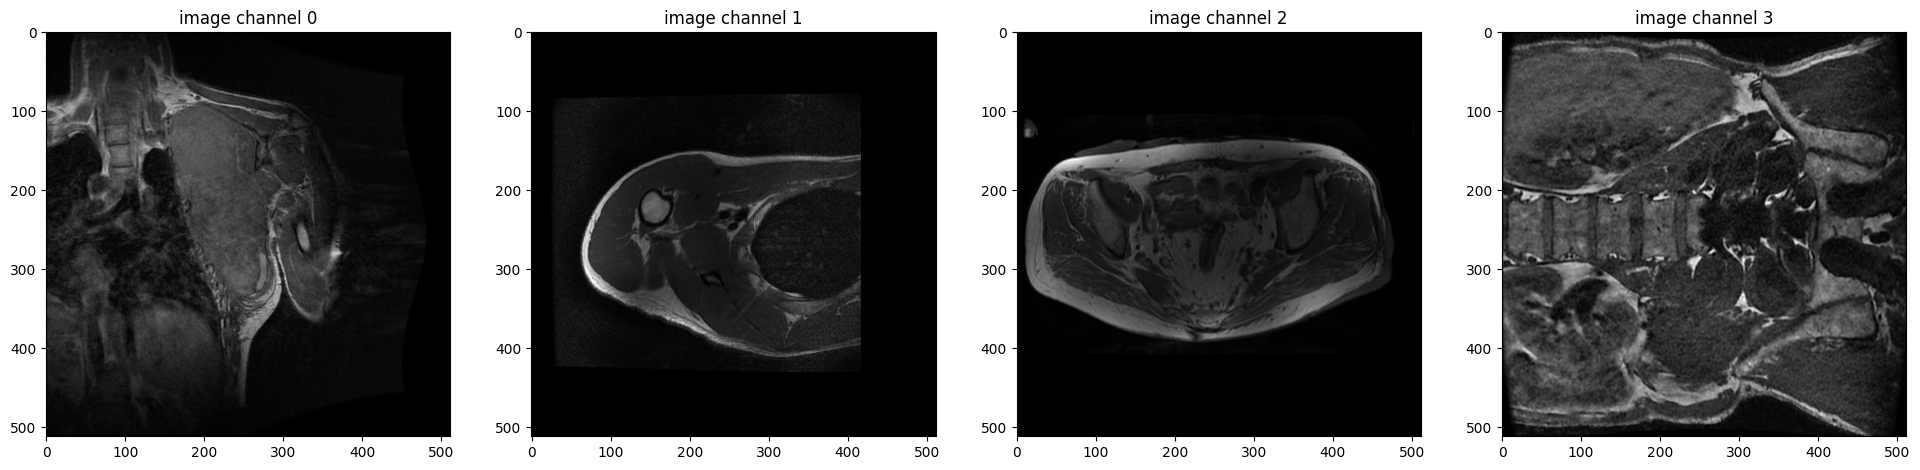

(array([101, 101, 101, ..., 339, 339, 339]), array([180, 181, 182, ..., 267, 268, 269]))
(array([161, 161, 161, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162,
       162, 162, 162, 162, 162, 162, 162, 163, 163, 163, 163, 163, 163,
       163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163,
       164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164,
       164, 164, 164, 164, 164, 164, 164, 165, 165, 165, 165, 165, 165,
       165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165,
       165, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166,
       166, 166, 166, 166, 166, 166, 166, 166, 167, 167, 167, 167, 167,
       167, 167, 167, 167, 167, 167, 167, 167]), array([189, 190, 191, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 19

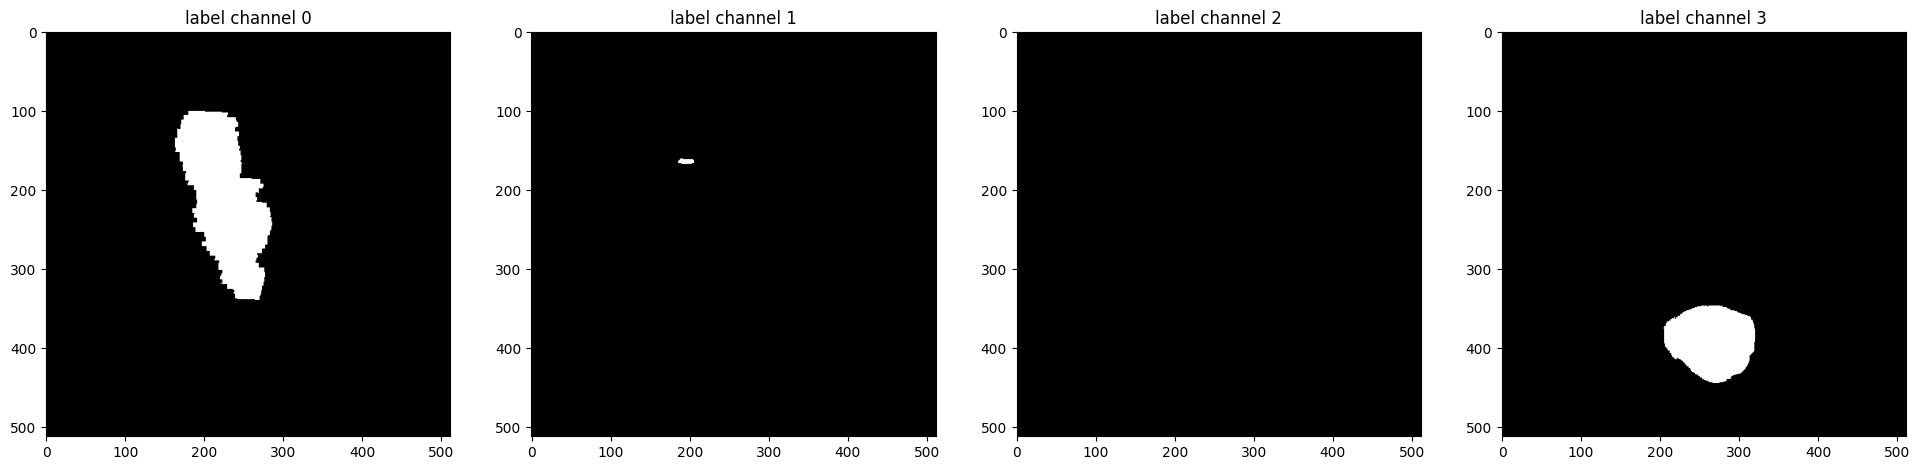

In [7]:
example_case = [data[0],data[1],data[2],data[14]]
print(f"image shape: {example_case[0]['image'].shape}")
print(f"segmentation shape: {example_case[0]['seg'].shape}")
print("Labels: {} ".format(np.unique(example_case[0]['label'])))
plt.figure("image", (24, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.title(f"image channel {i}")
    _, _, _, h = example_case[i]['image'].shape
    plt.imshow(example_case[i]["image"][0, :, :, int(h/2)].detach().cpu(), cmap="gray")
plt.show()

plt.figure("label", (24, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.title(f"label channel {i}")
    _, _, _, h = example_case[i]['seg'].shape
    plt.imshow(example_case[i]["seg"][0, :, :, int(h/2)].detach().cpu(), cmap="gray")
    print(np.where(example_case[i]["seg"][0, :, :, int(h/2)]==1))
plt.show()

In [5]:
print(f"image shape: {example_case[3]['image'].shape}")
print(f"segmentation shape: {example_case[3]['seg'].shape}")
print("Labels: {} ".format(np.unique(example_case[3]['label'])))

image shape: torch.Size([1, 406, 344, 97])
segmentation shape: torch.Size([1, 406, 344, 97])
Labels: [1] 


In [23]:
set = [{"image": img, "seg": seg, "label": label, "case_id": pid} for img, seg, label, pid in zip(img_paths, seg_paths,labels,ids)]
sets = [set[0],set[1],set[2],set[3]]
for i in range(15):
    f_img = nib.load(set[i]['image']).get_fdata()
    f_seg = nib.load(set[i]['seg']).get_fdata()
    set[i]['image'] = f_img
    set[i]['seg'] = f_seg    

image shape: (512, 512, 52)
segmentation shape: (512, 512, 52)
Labels: [1] 


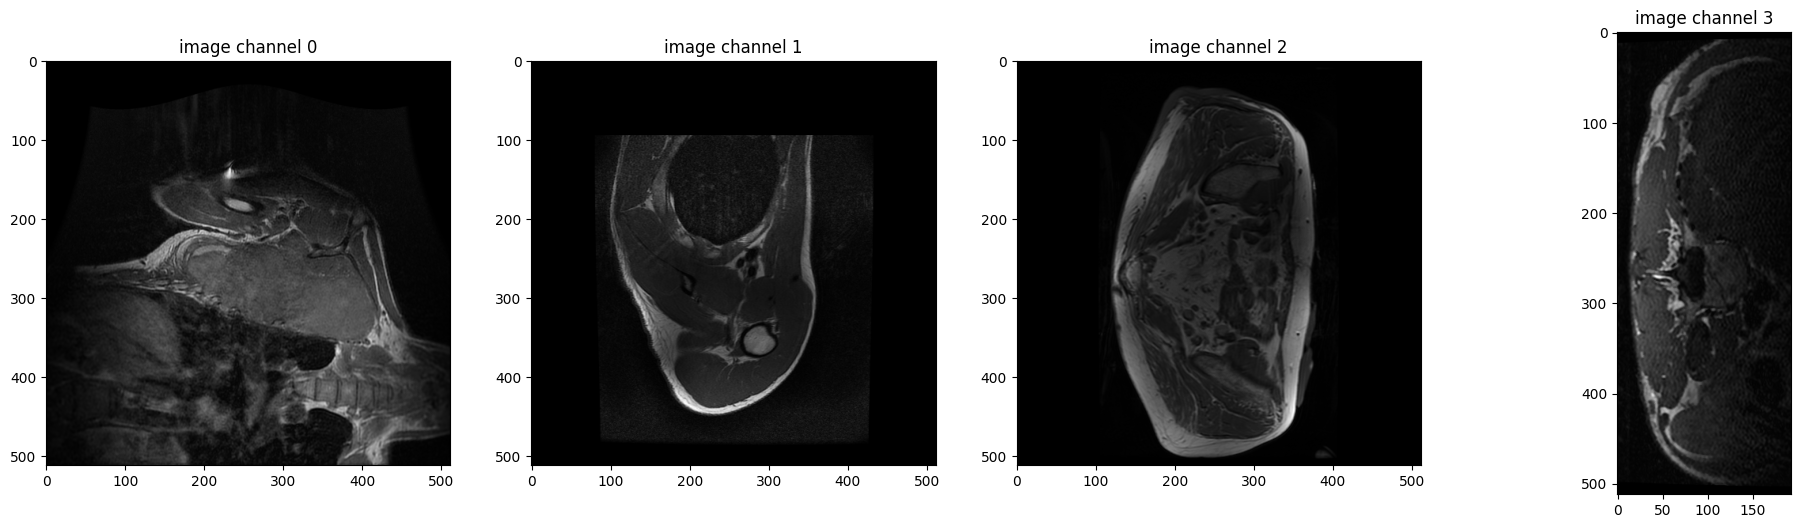

(array([227, 227, 227, ..., 347, 347, 347]), array([274, 275, 276, ..., 368, 369, 370]))
(array([306, 306, 306, 306, 307, 307, 307, 307, 307, 308, 308, 308, 308,
       308, 309, 309, 309, 309, 309, 309, 310, 310, 310, 310, 310, 310,
       311, 311, 311, 311, 311, 311, 312, 312, 312, 312, 312, 312, 313,
       313, 313, 313, 313, 313, 314, 314, 314, 314, 314, 314, 315, 315,
       315, 315, 315, 315, 316, 316, 316, 316, 316, 316, 317, 317, 317,
       317, 317, 317, 318, 318, 318, 318, 318, 318, 319, 319, 319, 319,
       319, 319, 320, 320, 320, 320, 320, 320, 320, 321, 321, 321, 321,
       321, 321, 321, 322, 322, 322, 322, 322, 322, 323, 323, 323, 323,
       323, 324, 324, 324, 324, 325, 325, 325]), array([345, 346, 347, 348, 345, 346, 347, 348, 349, 345, 346, 347, 348,
       349, 344, 345, 346, 347, 348, 349, 344, 345, 346, 347, 348, 349,
       344, 345, 346, 347, 348, 349, 344, 345, 346, 347, 348, 349, 344,
       345, 346, 347, 348, 349, 344, 345, 346, 347, 348, 349, 344, 34

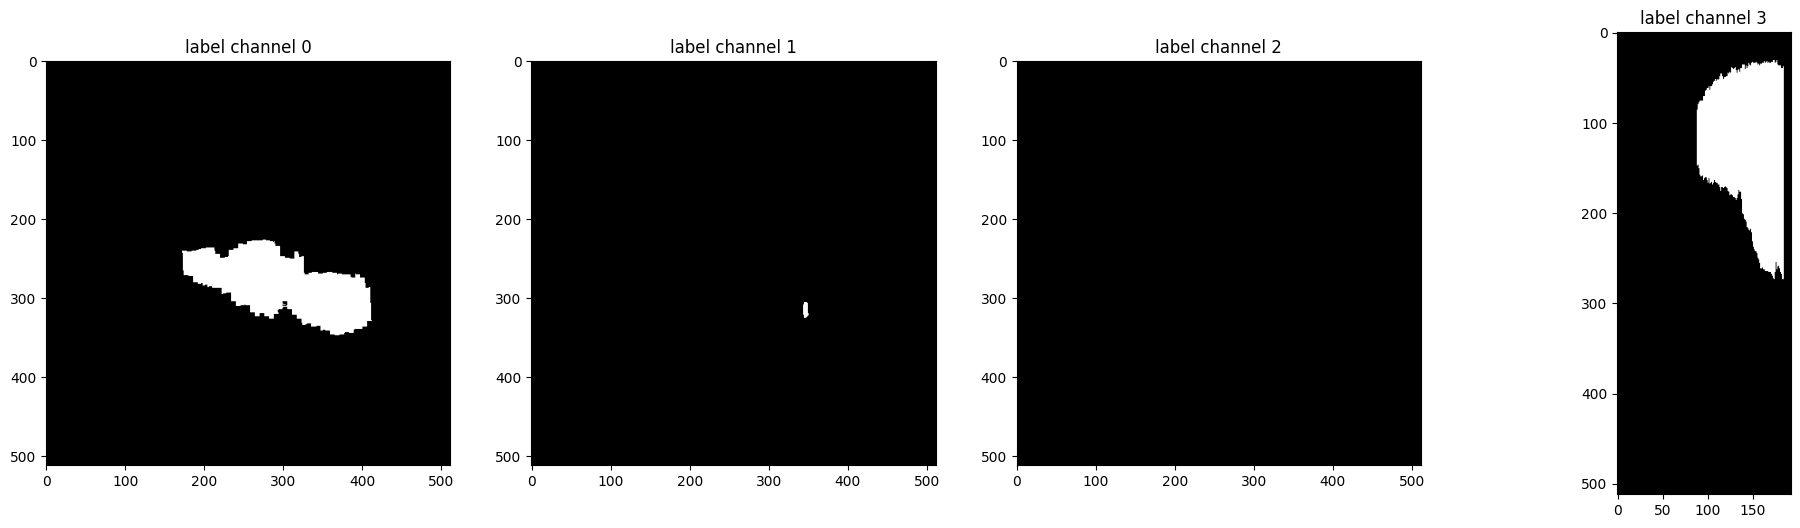

In [24]:
example_case = [set[0],set[1],set[2],set[14]]

print(f"image shape: {example_case[0]['image'].shape}")
print(f"segmentation shape: {example_case[0]['seg'].shape}")
print("Labels: {} ".format(np.unique(example_case[0]['label'])))
plt.figure("image", (24, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.title(f"image channel {i}")
    _, _, h = example_case[i]['image'].shape
    plt.imshow(example_case[i]["image"][:, :, int(h/2)], cmap="gray")
plt.show()

plt.figure("label", (24, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.title(f"label channel {i}")
    _, _, h = example_case[i]['seg'].shape
    plt.imshow(example_case[i]["seg"][:, :, int(h/2)], cmap="gray")
    print(np.where(example_case[i]["seg"][:, :, int(h/2)]==1))
plt.show()